# MAGIC Gamma Telescope

Data information: https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler # to standarize
from imblearn.over_sampling import RandomOverSampler# to oversampler
from sklearn.metrics import classification_report

In [2]:
os.chdir('C:\\Users\\Julian\\Desktop\\Cursos\\Cursos Github\\Machine_learning')
os.listdir()

['.git',
 '.gitattributes',
 'Basic_tools',
 'Data',
 'Inteligencia_artificial.pdf',
 'Introduction to python',
 'k-Means Clustering',
 'Logistic regression',
 'Machine learning algorithms',
 'README.md']

In [3]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

df = pd.read_csv('Data\\magic04.data', names = cols)
df.sample(3)

fLength   fWidth   fSize   fConc  fConc1    fAsym  fM3Long  fM3Trans  \
15017  64.2169  18.1686  2.5507  0.5832  0.4070 -38.8492 -66.5204   -4.0623   
5311   34.5073  12.2119  2.4661  0.3863  0.2068   4.8071 -15.9074   -4.6147   
4665   23.4823  11.8254  2.5611  0.4615  0.2404  16.1376 -11.3361    1.2537   

        fAlpha     fDist class  
15017  33.9807  168.5068     h  
5311   16.1890  218.6250     g  
4665   21.1996  118.6420     g

In [4]:
df['class'].value_counts()

class
g    12332
h     6688
Name: count, dtype: int64

In [5]:
# We're going to convert this to zero for G and one for H

df['class'] =  (df['class'] == 'g').astype(int)

In [6]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

In [7]:
df['class'].value_counts()

class
1    12332
0     6688
Name: count, dtype: int64

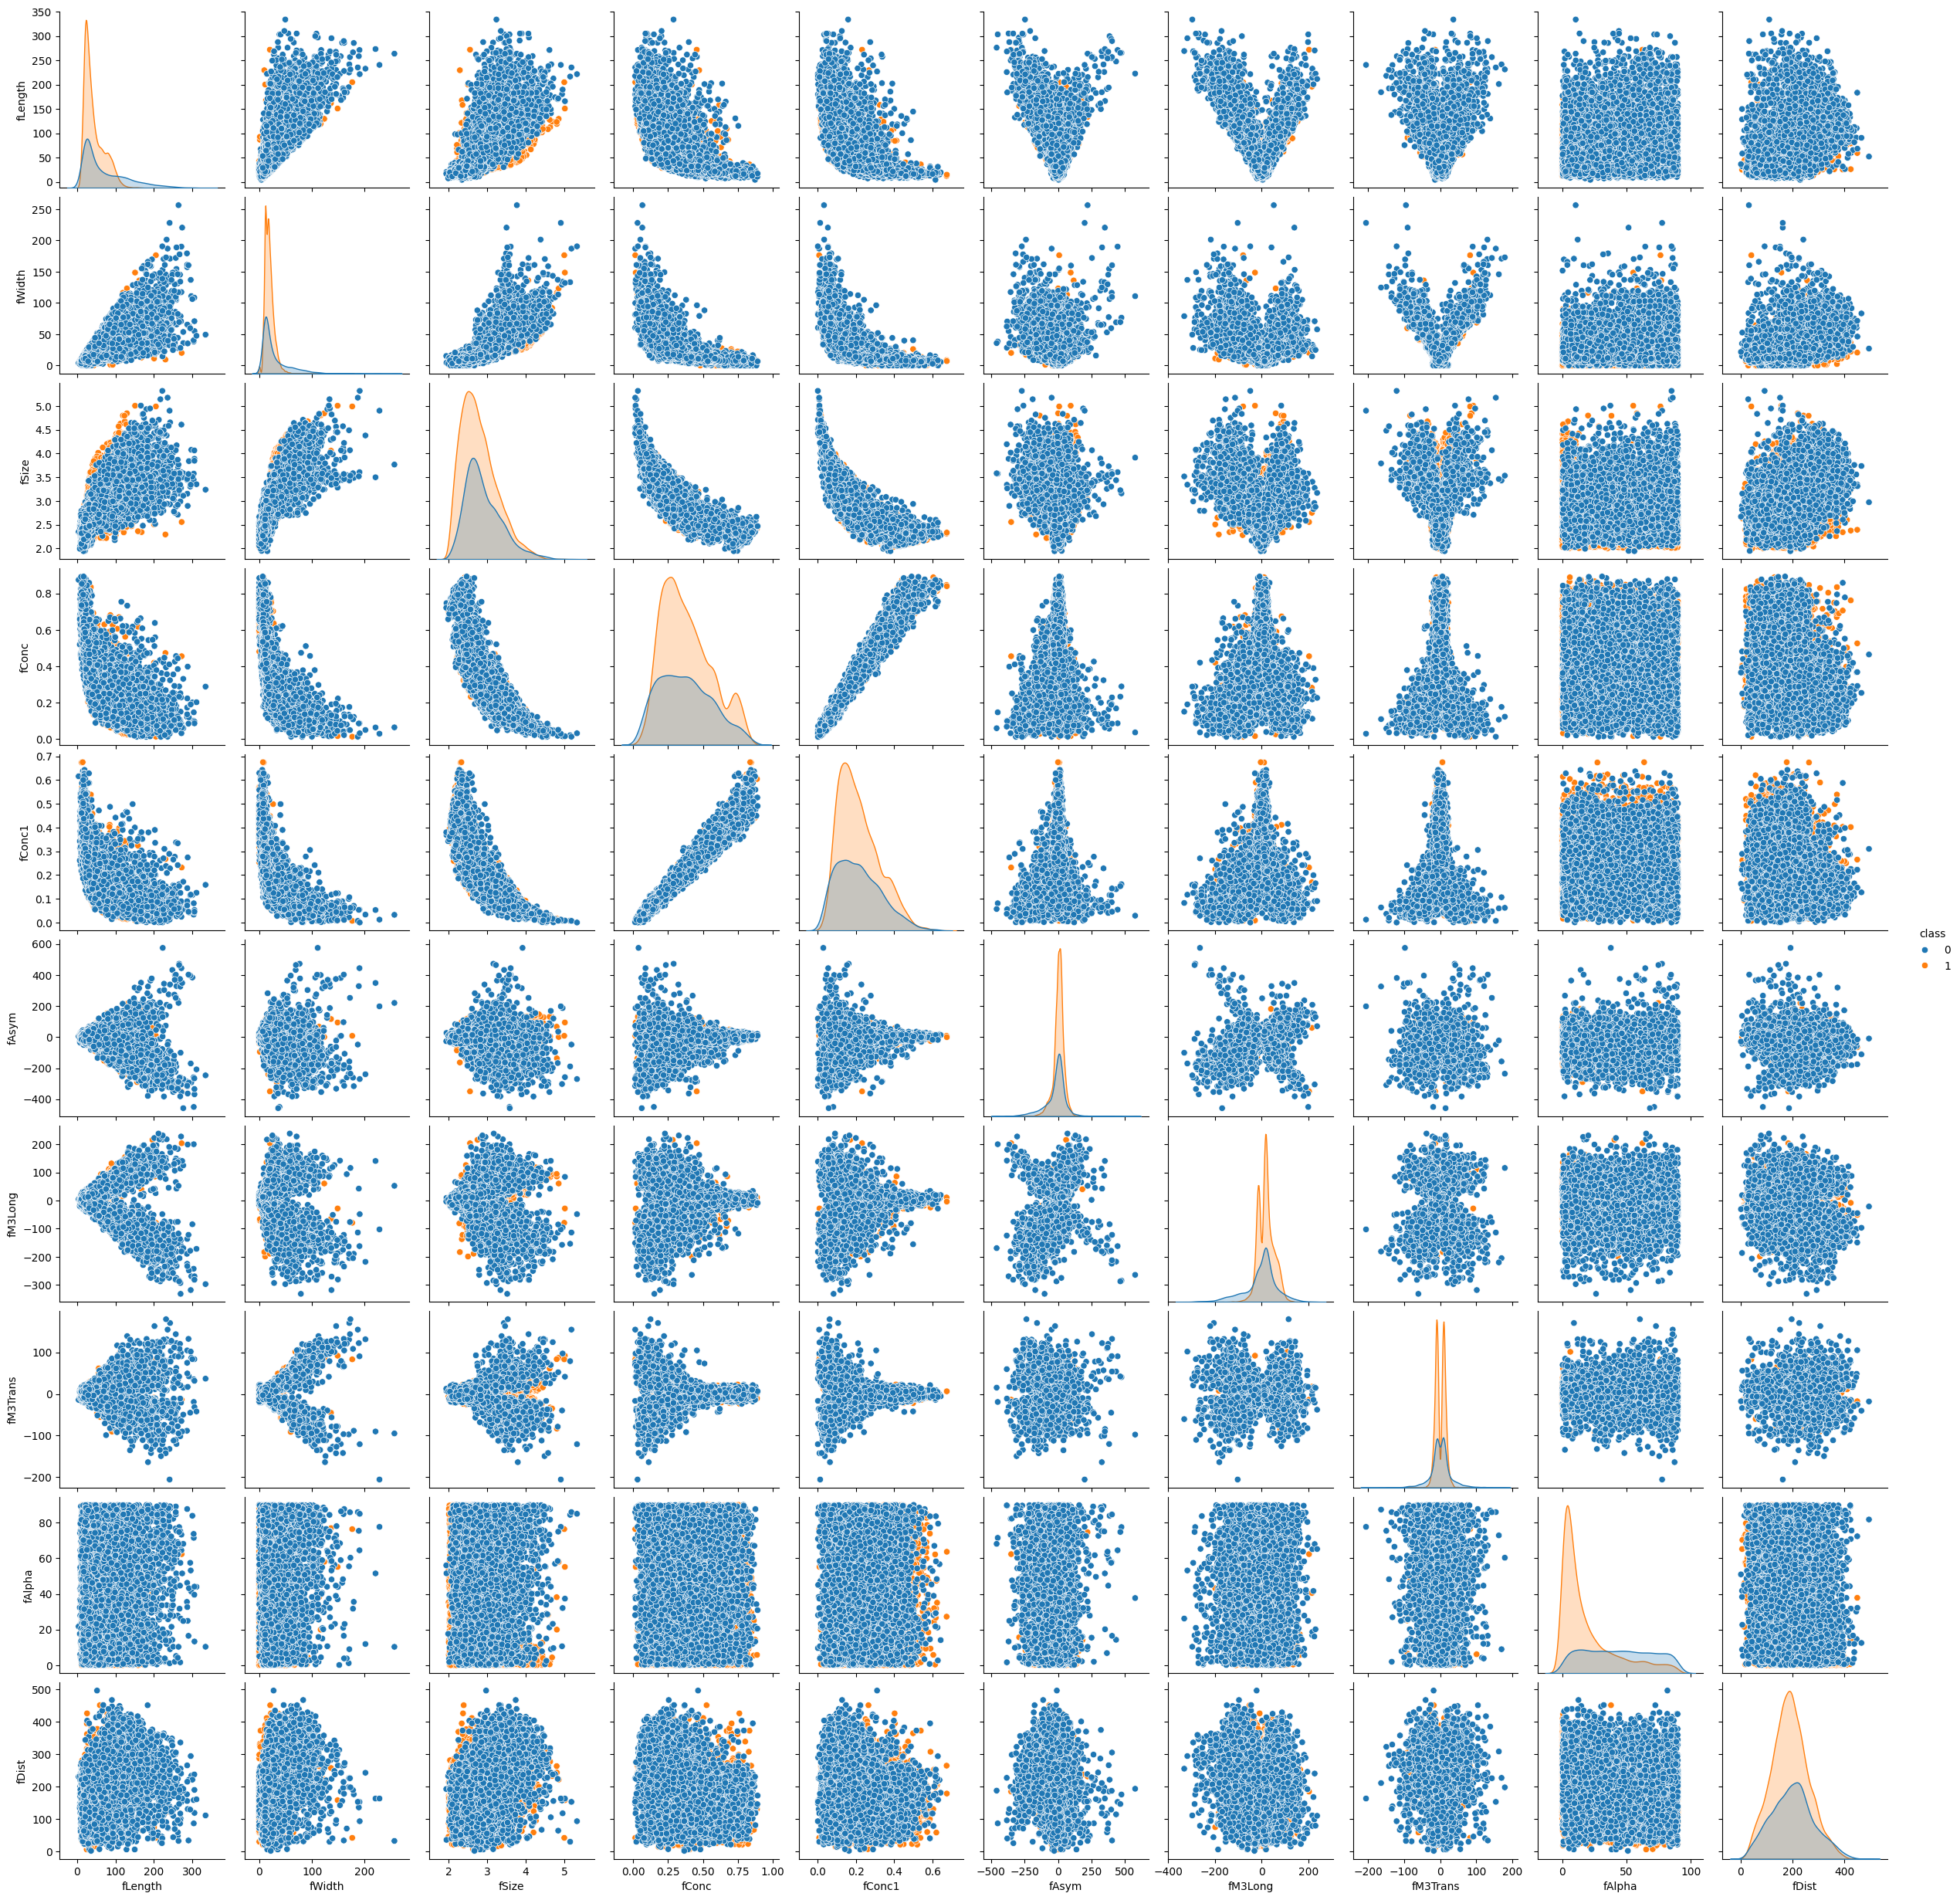

In [9]:
# We want to predict whether the class is G for gamma or H for hadron, given some features
# That is known as classification task

sns.pairplot(df[:-1], hue = 'class');

### Train, validation, test datasets

In [10]:
# We want to split our data set randomly
df.sample(frac= 1) # selects a random fraction of our df

fLength   fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
14151  124.8430  60.4039  3.1222  0.2445  0.1302  -52.3281 -146.1070   
16903   29.9041  19.5678  2.5257  0.2742  0.1416  -32.3572   22.3811   
224     20.6830   7.2158  2.0233  0.7014  0.3649   -1.1217    7.9330   
10369   49.1207  15.0367  2.6689  0.3751  0.1919   12.3614   27.5794   
1976    27.8575  12.7818  2.5905  0.4262  0.2144   27.2821   15.8826   
...         ...      ...     ...     ...     ...       ...       ...   
9173    42.0270  19.8294  2.5378  0.2928  0.1493   10.6125  -21.2785   
10371   35.5793  19.1013  3.0284  0.3091  0.1719   -5.2880   22.0654   
16967  170.3560  37.0682  3.2147  0.2781  0.1412 -179.0540 -129.5750   
14736   60.7878  25.4580  2.9269  0.1740  0.1036   32.8037   28.6824   
2079    23.3150   0.0000  2.0986  0.7171  0.3944    0.0000    0.0000   

       fM3Trans   fAlpha    fDist  class  
14151  -43.9028  80.6292  204.003      0  
16903   -3.7625  85.4343  148.340      0  
224     -5.9330  56.9230  137.980      1  
10369   -6.5523   1.1360  194.653      1  
1976     9.1153   9.7540  240.869      1  
...         ...      ...      ...    ...  
9173   -11.3906   4.8970  118.085      1  
10371   12.1228  12.3980  206.159      1  
16967   29.4761  63.8050  321.645      0  
14736  -15.8406  63.2290  200.136      0  
2079    -9.5652  22.0884  196.270      1  

[19020 rows x 11 columns]

In [21]:
np.random.seed(123)
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))]) # 60%, 20%,20%

C:\Users\Julian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [22]:
train['class'].value_counts()

class
1    7421
0    3991
Name: count, dtype: int64

In [23]:
# We need to scale the features: We will standardize the data to a z-score of 0
# And we're going to oversample our data set

def scale_dataset(df, oversample = False):
    X = df.iloc[:,:-1].values
    y = df.iloc[:,-1].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)	

    data = np.hstack((X, y.reshape((-1, 1))))

    return data, X, y

In [24]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [25]:
print(len(y_train), len(X_train))
print(sum(y_train == 1))

14842 14842
7421


### K-nearest neighbors (KNN)
Now we have our date properly formatted, so we can build some models.

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [98]:
y_pred = knn_model.predict(X_test)

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1298
           1       0.86      0.86      0.86      2506

    accuracy                           0.82      3804
   macro avg       0.79      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



### Naive Bayes

In [100]:
from sklearn.naive_bayes import GaussianNB

In [101]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [102]:
y_pred = nb_model.predict(X_test)

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.39      0.48      1298
           1       0.74      0.88      0.80      2506

    accuracy                           0.71      3804
   macro avg       0.68      0.63      0.64      3804
weighted avg       0.70      0.71      0.69      3804



### Logistic regression

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [107]:
y_pred = lg_model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69      1298
           1       0.84      0.81      0.83      2506

    accuracy                           0.78      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



### Support vector Machines (SVM)

In [110]:
from sklearn.svm import SVC

In [114]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [115]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1298
           1       0.90      0.89      0.89      2506

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



### Neural Net

In [18]:
import tensorflow as tf

In [26]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [27]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units= 32, activation= 'relu', input_shape = (10,)),
    tf.keras.layers.Dense(units= 16, activation= 'relu'),
    tf.keras.layers.Dense(units= 1, activation= 'sigmoid')
 ])

nn_model.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = 'binary_crossentropy',
                 metrics = ['accuracy'])

C:\Users\Julian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
history = nn_model.fit(
    X_train, y_train, epochs = 100, batch_size = 32, validation_split = .2, verbose = 0 #verbose means don't print anything
)

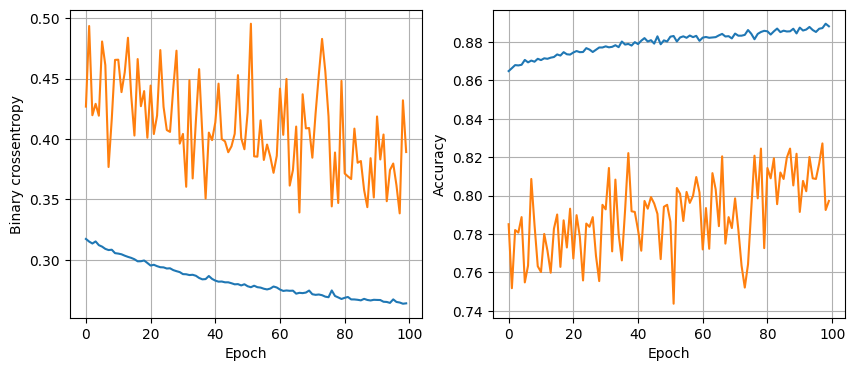

In [33]:
plot_history(history)

In [34]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = nn_model.evaluate(X_test, y_test, verbose=0)

print(f'Pérdida en el conjunto de prueba: {test_loss:.4f}')
print(f'Precisión en el conjunto de prueba: {test_accuracy:.4f}')


Pérdida en el conjunto de prueba: 0.3225
Precisión en el conjunto de prueba: 0.8665


In [38]:
# Predecir las etiquetas para X_test
y_pred = nn_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convertir probabilidades en clases binarias

# Generar el informe de clasificación
report = classification_report(y_test, y_pred_classes)

print(report)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.85      0.77      0.80      1367
           1       0.88      0.92      0.90      2437

    accuracy                           0.87      3804
   macro avg       0.86      0.84      0.85      3804
weighted avg       0.87      0.87      0.86      3804

